# Homework
1. Use the given dataset to train a one layer logistic model(train on train_X1 and train_y1)
2. Compare the convergence speed between cross entropy loss and mse loss(plot training accuracy graph)
3. Whether one layer logistic regression can solve the XOR like problem?

### 1. Use the given dataset to train a one layer logistic model(train on train_X1 and train_y1)

In [5]:
#import these
import os
import sys
import random
import pickle

%matplotlib inline
import numpy as np
np.seterr(all='raise')
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [6]:
#tools

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis=0), labels.take(j, axis=0)
        
def logistic(X):
    return 1 / (1 + np.exp(-X)) 

def net(X):
    return logistic(np.dot(X, W) + b)

def cross_entropy(y_hat, y):
    delta = 1e-8
    return - (y.reshape(y_hat.shape) * np.log(y_hat + delta) + (1 - y.reshape(y_hat.shape)) * np.log(1 - y_hat + delta)).mean()


def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean()


def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        y_hat = net(X)
        acc_sum += ((y_hat >= 0.5) == y.reshape(y_hat.shape)).sum()
        n += y.shape[0]
    return acc_sum / (n + 1e-8)

def sgd(lr, batch_size, w_grad, b_grad):
    global W, b
    W = W - lr * w_grad / batch_size
    b = b - lr * b_grad / batch_size

epoch 1, loss 0.0308, train acc 0.479, test acc 0.479
epoch 2, loss 0.0264, train acc 0.479, test acc 0.479
epoch 3, loss 0.0278, train acc 0.479, test acc 0.479
epoch 4, loss 0.0297, train acc 0.479, test acc 0.479
epoch 5, loss 0.0264, train acc 0.479, test acc 0.479
epoch 6, loss 0.0275, train acc 0.479, test acc 0.479
epoch 7, loss 0.0278, train acc 0.479, test acc 0.479
epoch 8, loss 0.0275, train acc 0.479, test acc 0.479
epoch 9, loss 0.0260, train acc 0.479, test acc 0.479
epoch 10, loss 0.0264, train acc 0.479, test acc 0.479
epoch 11, loss 0.0258, train acc 0.479, test acc 0.479
epoch 12, loss 0.0256, train acc 0.479, test acc 0.479
epoch 13, loss 0.0262, train acc 0.479, test acc 0.521
epoch 14, loss 0.0246, train acc 0.592, test acc 0.648
epoch 15, loss 0.0248, train acc 0.732, test acc 0.831
epoch 16, loss 0.0256, train acc 0.859, test acc 0.915
epoch 17, loss 0.0250, train acc 0.944, test acc 0.958
epoch 18, loss 0.0246, train acc 0.958, test acc 0.958
epoch 19, loss 0.02

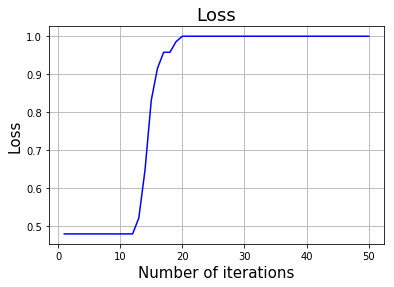

In [7]:
num_inputs = 4
num_outputs = 1
batch_size = 32
epoch = 50


X_train = np.array(pickle.load(open("train_X1.pkl", "rb")))
y_train = np.array(pickle.load(open("train_y1.pkl", "rb")))

#print(X_train)
#print(y_train)
###########################################################################################
# TODO

W = np.random.normal(scale=0.05, loc=0, size=(num_inputs, num_outputs))
b = np.zeros(num_outputs)

ws = []
bs = []
ac = []

def train(net, loss, num_epochs, batch_size, lr):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in data_iter(batch_size, X_train, y_train):
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)
            y = y.astype('float32')
            train_l_sum += l
            train_acc_sum += ((y_hat >= 0.5) == y.reshape(y_hat.shape)).sum()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(data_iter(np.shape(X_train)[0], X_train, y_train), net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        
        ws.append(W.copy().reshape(-1))
        bs.append(b.copy())
        ac.append(test_acc) 

###########################################################################################

train(net, cross_entropy, epoch, batch_size, 0.005)

def plot_acc(ac):
    plt.grid()
    plt.title('Loss', size=18)
    plt.xlabel('Number of iterations', size=15)
    plt.ylabel('Loss', size=15)
    plt.plot(range(1, 51), ac, color='blue', label='loss')
    
plot_acc(ac)

pickle.dump(W, open("weights1.pkl", "wb"))
pickle.dump(b, open("bias1.pkl", "wb"))

In [8]:
""" I will use your trained weights to do testing """
W = np.array(pickle.load(open("weights1.pkl", "rb")))
b = np.array(pickle.load(open("bias1.pkl", "rb")))
test_X = np.array(pickle.load(open("test_X1.pkl", "rb")))
test_y = np.array(pickle.load(open("test_y1.pkl", "rb")))
y_hat = net(test_X)
test_acc_sum = ((y_hat >= 0.5) == test_y.reshape(y_hat.shape)).sum()
print(test_acc_sum/len(test_y))

FileNotFoundError: [Errno 2] No such file or directory: 'test_X1.pkl'

### 2. Compare the convergence speed between cross entropy loss and mse loss(plot training accuracy graph)

epoch 1, loss 0.0050, train acc 0.408, test acc 0.419
epoch 2, loss 0.0050, train acc 0.411, test acc 0.425
epoch 3, loss 0.0050, train acc 0.414, test acc 0.429
epoch 4, loss 0.0049, train acc 0.416, test acc 0.434
epoch 5, loss 0.0048, train acc 0.422, test acc 0.440
epoch 6, loss 0.0048, train acc 0.425, test acc 0.445
epoch 7, loss 0.0047, train acc 0.432, test acc 0.450
epoch 8, loss 0.0047, train acc 0.441, test acc 0.456
epoch 9, loss 0.0046, train acc 0.444, test acc 0.459
epoch 10, loss 0.0046, train acc 0.457, test acc 0.465
epoch 11, loss 0.0045, train acc 0.464, test acc 0.471
epoch 12, loss 0.0045, train acc 0.468, test acc 0.478
epoch 13, loss 0.0044, train acc 0.475, test acc 0.486
epoch 14, loss 0.0044, train acc 0.486, test acc 0.495
epoch 15, loss 0.0043, train acc 0.495, test acc 0.501
epoch 16, loss 0.0043, train acc 0.503, test acc 0.508
epoch 17, loss 0.0042, train acc 0.509, test acc 0.515
epoch 18, loss 0.0042, train acc 0.515, test acc 0.521
epoch 19, loss 0.00

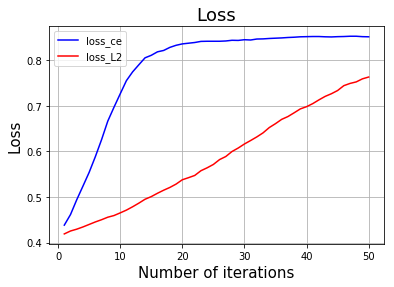

In [9]:
def mse(y_hat, y):
    delta = 1e-8
    return  (1./2*((y.reshape(y_hat.shape)-y_hat)**2)).mean()

def reset():
    global W,b 
    W = W_int
    b = b_int

num_inputs = 2
num_outputs = 1
X, y = make_blobs(n_samples=4096, centers=2, n_features=2, cluster_std=5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


W_int = np.random.normal(scale=0.05, loc=0, size=(num_inputs, num_outputs))
b_int = np.zeros(num_outputs)

W = W_int
b = b_int

num_epochs, lr = 50, 0.0001
batch_size = 32
###########################################################################################
# TODO


def train_ce(net, loss, num_epochs, batch_size, lr):
    ws = []
    bs = []
    ac = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in data_iter(batch_size, X_train, y_train):
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)
            y = y.astype('float32')
            train_l_sum += l
            train_acc_sum += ((y_hat >= 0.5) == y.reshape(y_hat.shape)).sum()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(data_iter(batch_size, X_test, y_test), net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        
        ws.append(W.copy().reshape(-1))
        bs.append(b.copy())
        ac.append(test_acc) 
    return ac


def train_L2(net, loss, num_epochs, batch_size, lr):
    ws = []
    bs = []
    ac = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in data_iter(batch_size, X_train, y_train):
            y_hat = net(X)
            l = mse(y_hat, y).sum()
            w_grad = np.dot(X.T, (y_hat * (1-y_hat)) * (y_hat - y.reshape(y_hat.shape)))
            b_grad = ((y_hat, 1-y_hat) * (y_hat - y.reshape(y_hat.shape))).sum()
            
            sgd(lr, batch_size, w_grad, b_grad)
            y = y.astype('float32')
            train_l_sum += l
            train_acc_sum += ((y_hat >= 0.5) == y.reshape(y_hat.shape)).sum()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(data_iter(batch_size, X_test, y_test), net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        
        ws.append(W.copy().reshape(-1))
        bs.append(b.copy())
        ac.append(test_acc)
    return ac
        
    

ac_L2 = train_L2(net, cross_entropy, num_epochs, batch_size, 10e-5)
reset()
ac_ce = train_ce(net, cross_entropy, num_epochs, batch_size, 10e-5)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(range(1, 51), ac_ce, color='blue', label='loss_ce')
plt.plot(range(1, 51), ac_L2, color='red', label='loss_L2')
plt.legend()

###########################################################################################

### 3. Whether one layer logistic regression can solve the XOR like problem?

epoch 1, loss 0.1733, train acc 0.250, test acc 0.500
epoch 2, loss 0.1733, train acc 0.500, test acc 0.500
epoch 3, loss 0.1733, train acc 0.500, test acc 0.500
epoch 4, loss 0.1733, train acc 0.500, test acc 0.500
epoch 5, loss 0.1733, train acc 0.500, test acc 0.500
epoch 6, loss 0.1733, train acc 0.500, test acc 0.500
epoch 7, loss 0.1733, train acc 0.500, test acc 0.500
epoch 8, loss 0.1733, train acc 0.500, test acc 0.500
epoch 9, loss 0.1733, train acc 0.500, test acc 0.500
epoch 10, loss 0.1733, train acc 0.500, test acc 0.500
epoch 11, loss 0.1733, train acc 0.500, test acc 0.500
epoch 12, loss 0.1733, train acc 0.500, test acc 0.500
epoch 13, loss 0.1733, train acc 0.500, test acc 0.500
epoch 14, loss 0.1733, train acc 0.500, test acc 0.500
epoch 15, loss 0.1733, train acc 0.500, test acc 0.500
epoch 16, loss 0.1733, train acc 0.500, test acc 0.500
epoch 17, loss 0.1733, train acc 0.500, test acc 0.500
epoch 18, loss 0.1733, train acc 0.500, test acc 0.500
epoch 19, loss 0.17

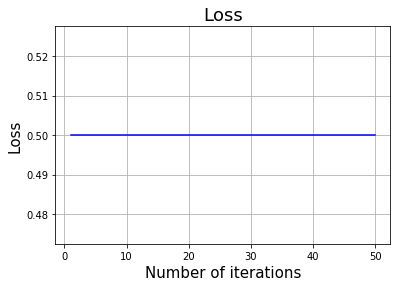

In [10]:
num_inputs = 2
num_outputs = 1

X_train = np.array([[1,0], [0,1], [1,1], [0,0]])
y_train = np.array([1, 1, 0, 0])

num_epochs, lr = 100, 5
batch_size = 4
###########################################################################################
# TODO
W = np.random.normal(scale=0.05, loc=0, size=(num_inputs, num_outputs))
b = np.zeros(num_outputs)

ws = []
bs = []
ac = []

def train(net, loss, num_epochs, batch_size, lr):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in data_iter(batch_size, X_train, y_train):
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            w_grad = np.dot(X.T, (y_hat - y.reshape(y_hat.shape)))
            b_grad = (y_hat - y.reshape(y_hat.shape)).sum()
            sgd(lr, batch_size, w_grad, b_grad)
            y = y.astype('float32')
            train_l_sum += l
            train_acc_sum += ((y_hat >= 0.5) == y.reshape(y_hat.shape)).sum()
            n += y.shape[0]
            
        test_acc = evaluate_accuracy(data_iter(np.shape(X_train)[0], X_train, y_train), net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
        
        ws.append(W.copy().reshape(-1))
        bs.append(b.copy())
        ac.append(test_acc) 

train(net, cross_entropy, epoch, batch_size, 1)

def plot_acc(ac):
    plt.grid()
    plt.title('Loss', size=18)
    plt.xlabel('Number of iterations', size=15)
    plt.ylabel('Loss', size=15)
    plt.plot(range(1, 51), ac, color='blue', label='loss')
    
plot_acc(ac)
###########################################################################################